# seaborn: 통계적 관계 시각화

https://seaborn.pydata.org/tutorial/relational.html

### 언제 사용하나요?
- 변수 간의 관련성을 보고 싶을 때 사용합니다.
- 예를들어,   
  1) 공부시간에 따른 성적의 추이가 궁금할 때,   
  2) 계절에 따른 매출이 궁금할 때  
  3) 시간대별 값이 궁금할 때  
사용할 수 있습니다.

### 어떻게 그리나요?
- **relplot, scatterplot, lineplot**을 사용합니다. 
- **relplot**은 scatterplot과 lineplot이 결합된 형태입니다. 
- scatterplot은 데이터의 분포를 점으로 표현하는 산포도이고,  
- lineplot은 데이터의 분포를 선으로 이은 선그래프입니다.


### 관련 API

* relplot() : 
https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot


* scatterplot(): https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot


* lineplot():
https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

데이터 시각화를 위한 준비

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# scatter plots

In [4]:
tips = sns.load_dataset("tips")
tips
#5개만 보고싶으면 tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


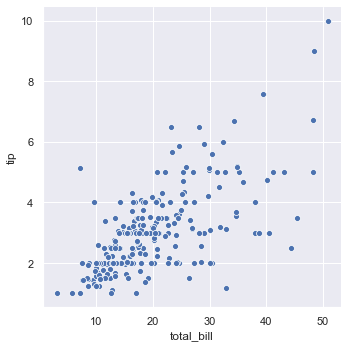

In [5]:
# relplot의 디폴트 셋팅:  kind='scatter',
sns.relplot(x="total_bill", y="tip", data=tips);

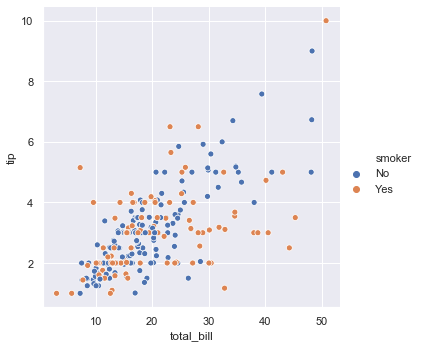

In [6]:
# hue : 카테고리별 구분
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

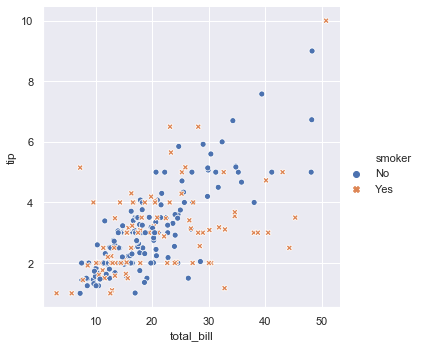

In [7]:
# style : 카테고리별 다른 스타일 지정
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

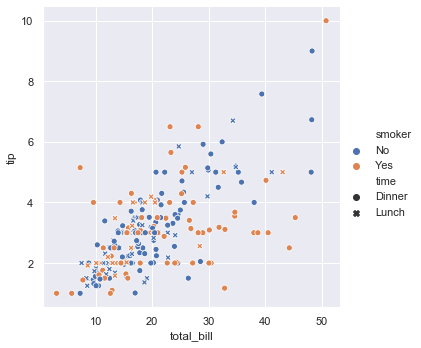

In [8]:
# hue와 style을 다른 데이터로 지정
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

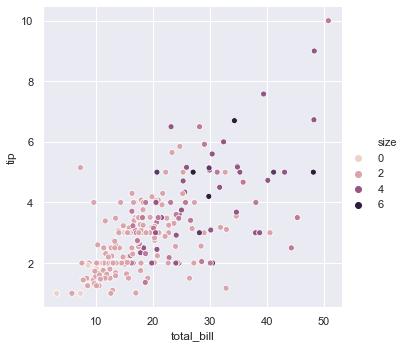

In [9]:
# hue를 다른 값으로 변경(여러가지 데이터가 있는 경우)
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

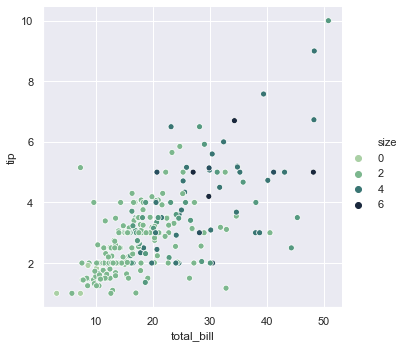

In [10]:
# hue의 팔레트를 지정
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

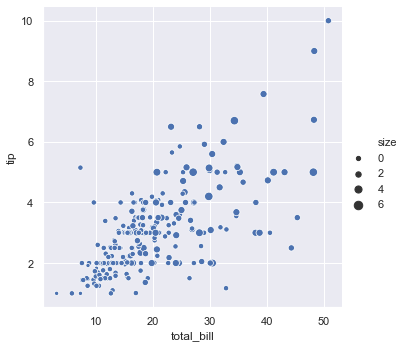

In [11]:
# size 지정
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

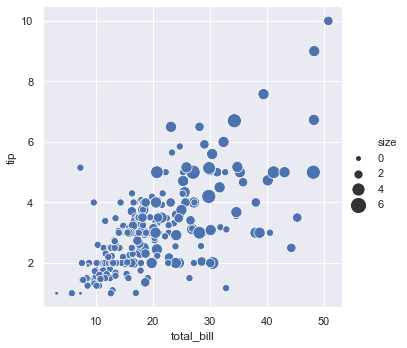

In [12]:
# sizes: size 크기를 지정
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

# line plots

In [13]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df

,time,value
0,0,1.459237
1,1,0.268852
2,2,0.833677
3,3,1.577928
4,4,1.904130
...,...,...
495,495,25.661465
496,496,25.901583
497,497,27.421849
498,498,28.051892


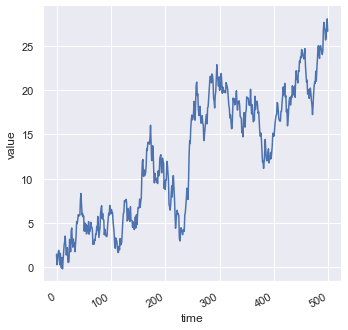

In [14]:
# relplot의 kind를 line으로 지정해서 line plot 그림
g = sns.relplot(x="time", y="value", kind="line", data=df)

# 시간데이터 값이 서로 겹칠 때, 위치 조정(각도 회전)  -facit? 그리드에서만 먹힌다!!!????
g.fig.autofmt_xdate()

In [15]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df

,x,y
0,2.376473,0.837904
1,1.797616,1.339050
2,1.147267,1.069465
3,1.015715,0.518754
4,1.305333,0.356983
...,...,...
495,42.252515,12.078162
496,41.914881,11.982953
497,43.088334,11.651753
498,42.474556,10.625960


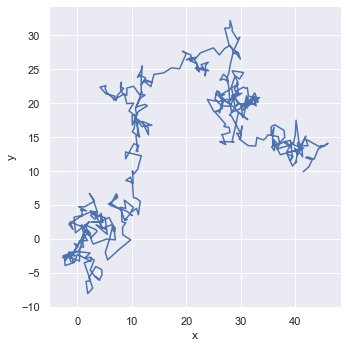

In [16]:
# sort 옵션: 정렬하지 않고, line plot 그리기
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

# Aggregation and representing uncertainty

In [17]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


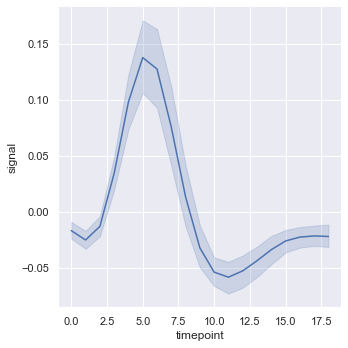

In [18]:
# 평균과 평균주변의 95% 신뢰구간을 표시
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

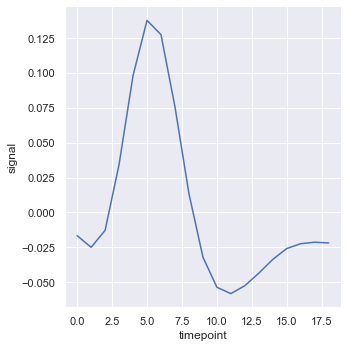

In [19]:
# ci 옵션: 신뢰구간 표시 제거
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

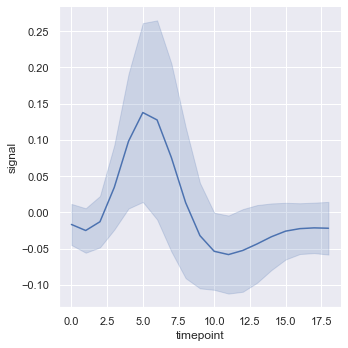

In [20]:
# ci 옵션: 표준편차
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

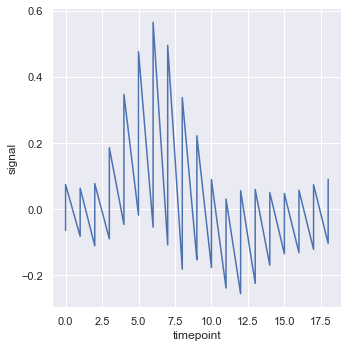

In [21]:
# estimator옵션: 대표값을 설정하지 않고 그림
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

# Plotting subsets of data with semantic mappings

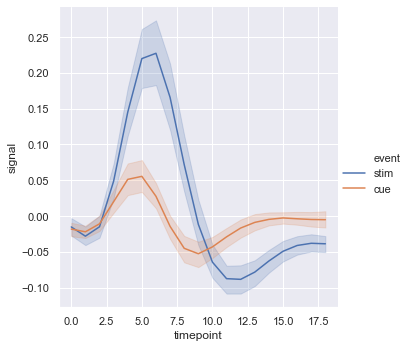

In [22]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

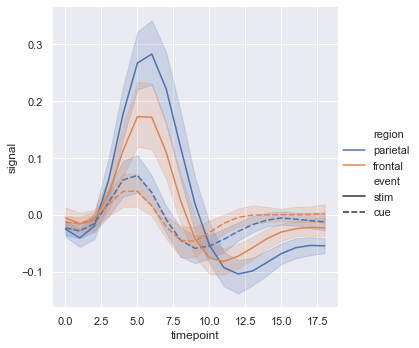

In [23]:
## hue와 style을 다른 데이터로 지정 : 패턴이 변경
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

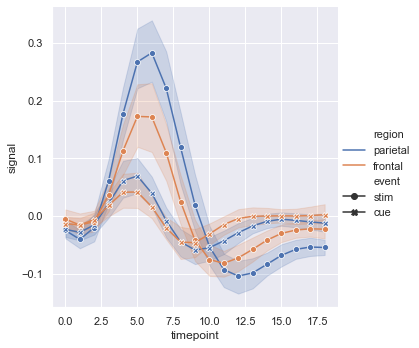

In [24]:
#dashes=False, markers=True
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

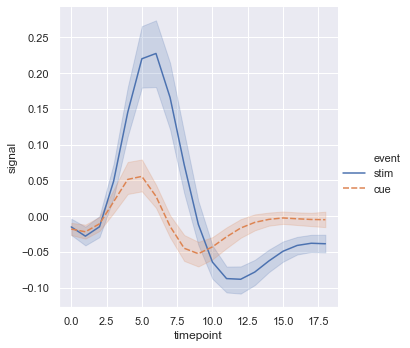

In [25]:
# hue와 style을 같은 데이터로 지정 : 선의 색상과 스타일을 모두 변경
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

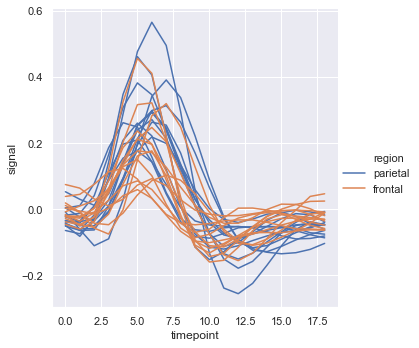

In [26]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

In [27]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


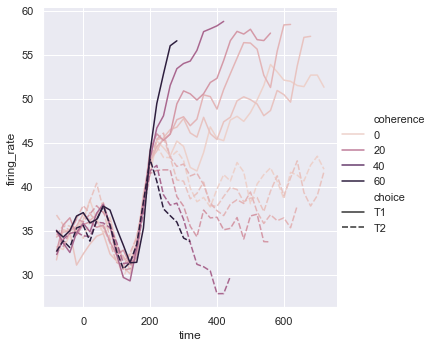

In [28]:
# 선그래프의 hue 설정: 기본
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

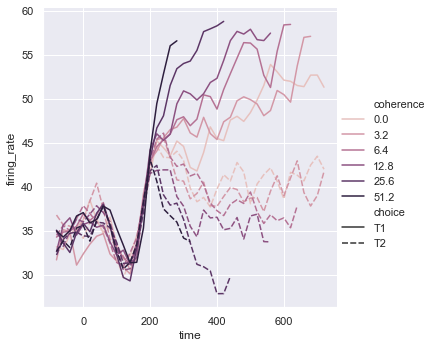

In [29]:
# 선그래프의 hue 설정: 커스텀(pallette)
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

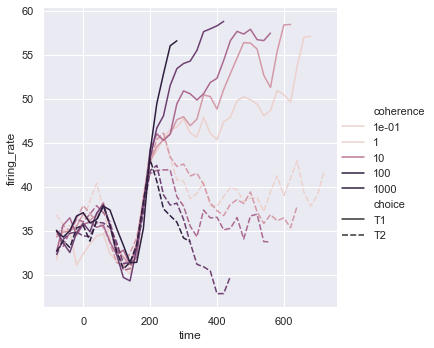

In [30]:
# 선그래프의 hue 설정: 컬러맵의 정규화 방법 변경(LogNorm)
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

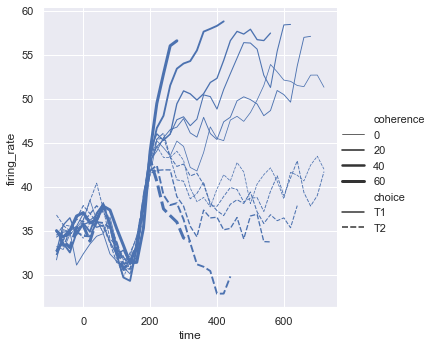

In [31]:
# 선그래프의 size , style
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

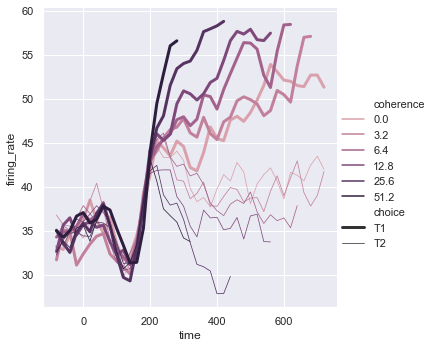

In [32]:
# 선그래프의 hue, size 
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

# 날짜데이터 시각화

In [33]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
df

,time,value
0,2017-01-01,1.725049
1,2017-01-02,1.100690
2,2017-01-03,0.053714
3,2017-01-04,0.861839
4,2017-01-05,1.630537
...,...,...
495,2018-05-11,42.146917
496,2018-05-12,41.984170
497,2018-05-13,42.644729
498,2018-05-14,42.217891


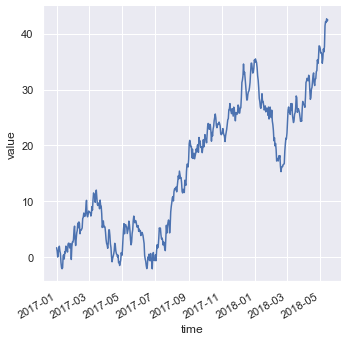

In [34]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

# Facet으로 여러 관계 표시하기

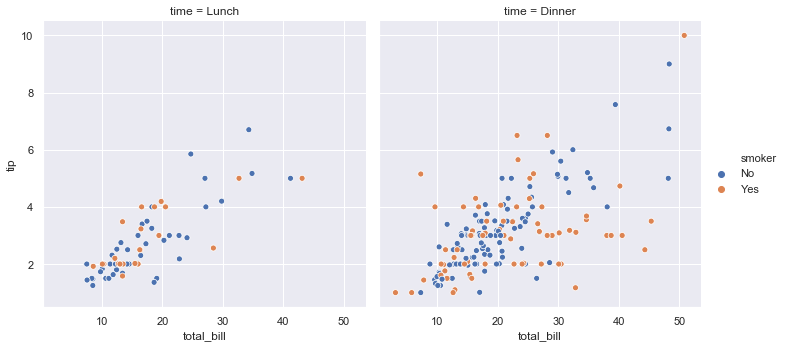

In [35]:
# "time"을 facet 처리
# row, col : names of variables in ``data``, optional
#     Categorical variables that will determine the faceting of the grid.
sns.relplot(x="total_bill", y="tip", hue="smoker",
             col="time",data=tips);

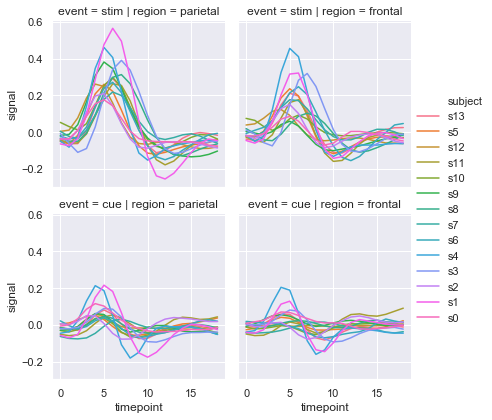

In [36]:
# col과 row 추가, height 조절
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

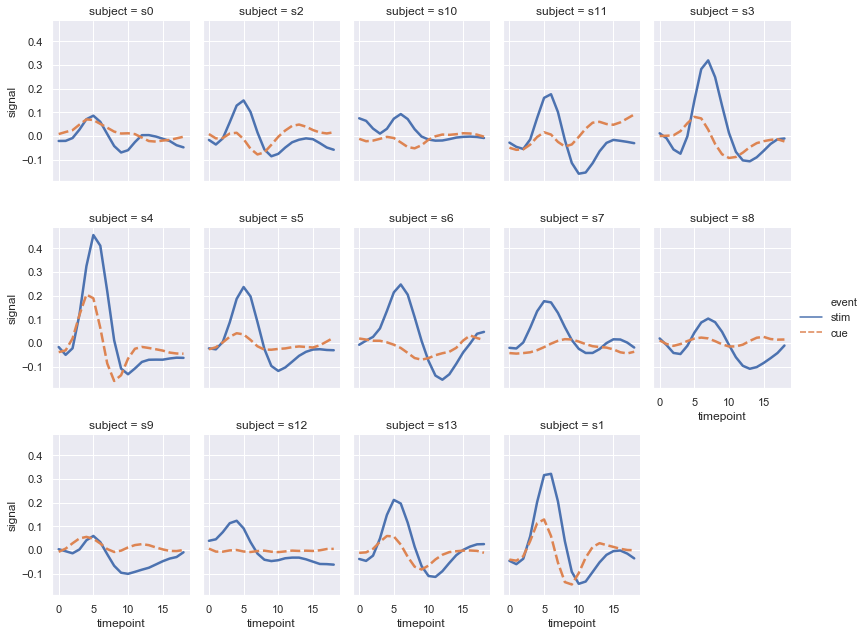

In [37]:

# 여러 변수에 대한 효과 
# 1) 해당 변수를 열(col)에서 패싯화
# 2) 다음 패싯으로 래핑(col_wrap)
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));